In [5]:
import numpy as np
import pynbody
import matplotlib.pyplot as plt
import matplotlib as mpl
import pynbody.plot as pp
import pickle
import pandas as pd
import pynbody.plot.sph as sph

In [6]:
timestep='001152'
sim_1 ='/home/christenc/Data/Sims/h229.cosmo50PLK.3072g/h229.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h229.cosmo50PLK.3072gst5HbwK1BH.' + timestep
sim = pynbody.load(sim_1)
h = sim.halos()
sim.physical_units()
i = 9

halo_info = sim.halos(dummy=True)
halo = h.load_copy(i)
halo.physical_units()
pynbody.analysis.halo.center(halo)
rvir = 15.05

inner_sphere_wind = pynbody.filt.Sphere(str(rvir) + ' kpc', [0,0,0])
outer_sphere_wind = pynbody.filt.Sphere(str(3*rvir) + ' kpc', [0,0,0])
shell_part_wind = sim[outer_sphere_wind & ~inner_sphere_wind].gas
print(shell_part_wind)

inner_sphere = pynbody.filt.Sphere(str(.9*rvir) + ' kpc', [0,0,0])
outer_sphere = pynbody.filt.Sphere(str(rvir) + ' kpc', [0,0,0])
shell_part = sim[outer_sphere & ~inner_sphere].gas

print(shell_part)

velocity = shell_part['vel'].in_units('kpc yr**-1')
r = shell_part['pos'].in_units('kpc')

vr = np.sum((velocity*r), axis=1)

Vout = []
for x in range(len(vr)):
    if vr[x] > 0:
        vel = list(velocity[x])
        Vout.append(vel)

<SimSnap "/home/christenc/Data/Sims/h229.cosmo50PLK.3072g/h229.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h229.cosmo50PLK.3072gst5HbwK1BH.001152:sphere&~sphere::gas" len=0>
<SimSnap "/home/christenc/Data/Sims/h229.cosmo50PLK.3072g/h229.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h229.cosmo50PLK.3072gst5HbwK1BH.001152:sphere&~sphere::gas" len=0>


In [7]:
Wind_mass = np.sum(shell_part_wind['mass'])

avecs = np.array(Vout)
amags = (np.sum((avecs**2), axis=1))**.5
bvec = np.mean(np.array(shell_part_wind['mass'])[np.newaxis].T * shell_part_wind['vel'],axis=0)/Wind_mass
bmag = (np.sum(bvec**2)**.5)

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
plt.figure(figsize=(3,3), dpi=300)
sph.image(halo.star,width ='50 kpc',cmap="YlOrRd")
#sph.velocity_image(sim.star,width=800,cmap="YlOrRd")
#sph.velocity_image(shell_part_wind,width=800,cmap="YlOrRd")
#sph.velocity_image(shell_part_wind, vector_color="cyan", qty="temp",width=300,cmap="YlOrRd",
#                   denoise=True,approximate_fast=False, show_cbar = True, threaded=False)
plt.show()

# Wind = 1-3 Rvir

In [8]:
timestep='003584'
sim_1 ='/home/christenc/Data/Sims/h148.cosmo50PLK.3072g/h148.cosmo50PLK.3072g3HbwK1BH/snapshots/h148.cosmo50PLK.3072g3HbwK1BH.' + timestep
s1 = pynbody.load(sim_1)
h1 = s1.halos()
s1.physical_units()
i = 17
sim = s1
h = h1

halo_info = sim.halos(dummy=True)
halo = h.load_copy(i)
halo.physical_units()
pynbody.analysis.halo.center(halo)
rvir = halo_info[i].properties['Rvir']/halo_info[i].properties['h']*halo_info[i].properties['a']

inner_sphere_wind = pynbody.filt.Sphere(str(rvir) + ' kpc', [0,0,0])
outer_sphere_wind = pynbody.filt.Sphere(str(3*rvir) + ' kpc', [0,0,0])
shell_part_wind = sim[outer_sphere_wind & ~inner_sphere_wind].gas
print(shell_part_wind)

inner_sphere = pynbody.filt.Sphere(str(.9*rvir) + ' kpc', [0,0,0])
outer_sphere = pynbody.filt.Sphere(str(rvir) + ' kpc', [0,0,0])
shell_part = sim[outer_sphere & ~inner_sphere].gas

print(shell_part)

velocity = shell_part['vel'].in_units('kpc yr**-1')
r = shell_part['pos'].in_units('kpc')

vr = np.sum((velocity*r), axis=1)

Vout = []
for x in range(len(vr)):
    if vr[x] > 0:
        vel = list(velocity[x])
        Vout.append(vel)


<SimSnap "/home/christenc/Data/Sims/h148.cosmo50PLK.3072g/h148.cosmo50PLK.3072g3HbwK1BH/snapshots/h148.cosmo50PLK.3072g3HbwK1BH.003584:sphere&~sphere::gas" len=5693>
<SimSnap "/home/christenc/Data/Sims/h148.cosmo50PLK.3072g/h148.cosmo50PLK.3072g3HbwK1BH/snapshots/h148.cosmo50PLK.3072g3HbwK1BH.003584:sphere&~sphere::gas" len=74>


In [9]:
Wind_mass = np.sum(shell_part_wind['mass'])

avecs = np.array(Vout)
amags = (np.sum((avecs**2), axis=1))**.5
bvec = np.mean(np.array(shell_part_wind['mass'])[np.newaxis].T * shell_part_wind['vel'],axis=0)/Wind_mass
bmag = (np.sum(bvec**2)**.5)

# Halo 2

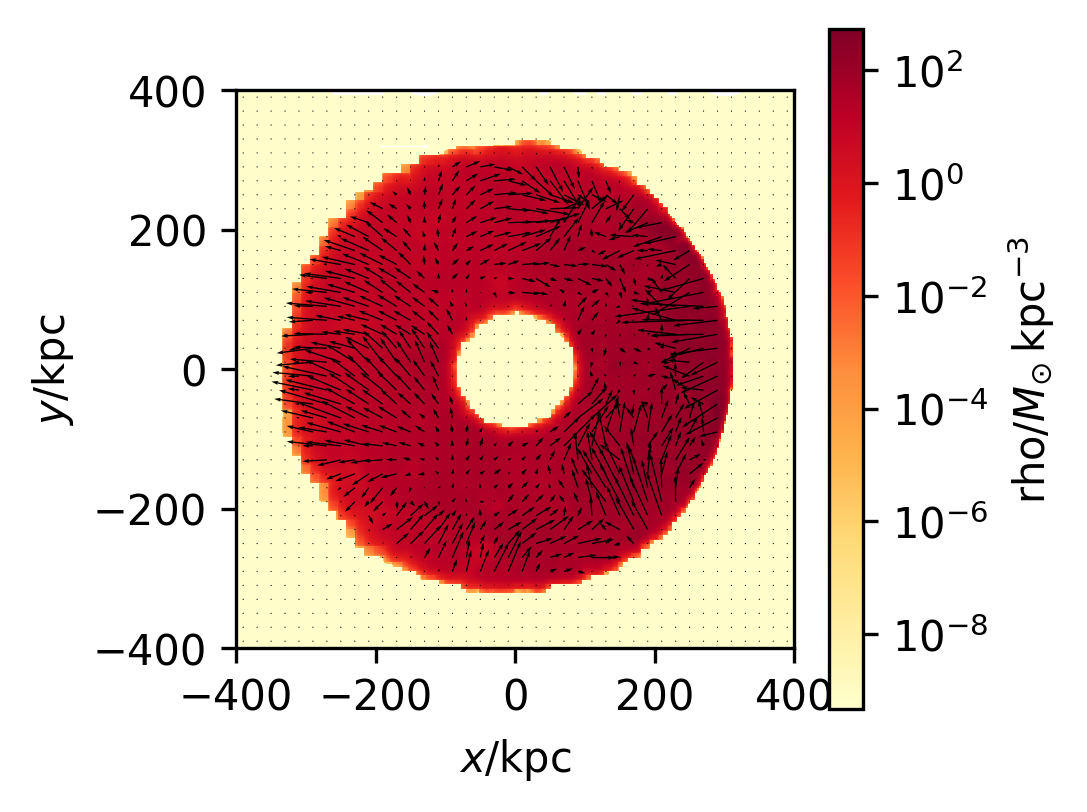

In [13]:
plt.figure(figsize=(3,3), dpi=300)
sph.velocity_image(shell_part_wind,width=800,cmap="YlOrRd")
#sph.velocity_image(shell_part_wind, vector_color="cyan", qty="temp",width=300,cmap="YlOrRd",
#                   denoise=True,approximate_fast=False, show_cbar = True, threaded=False)
plt.show()

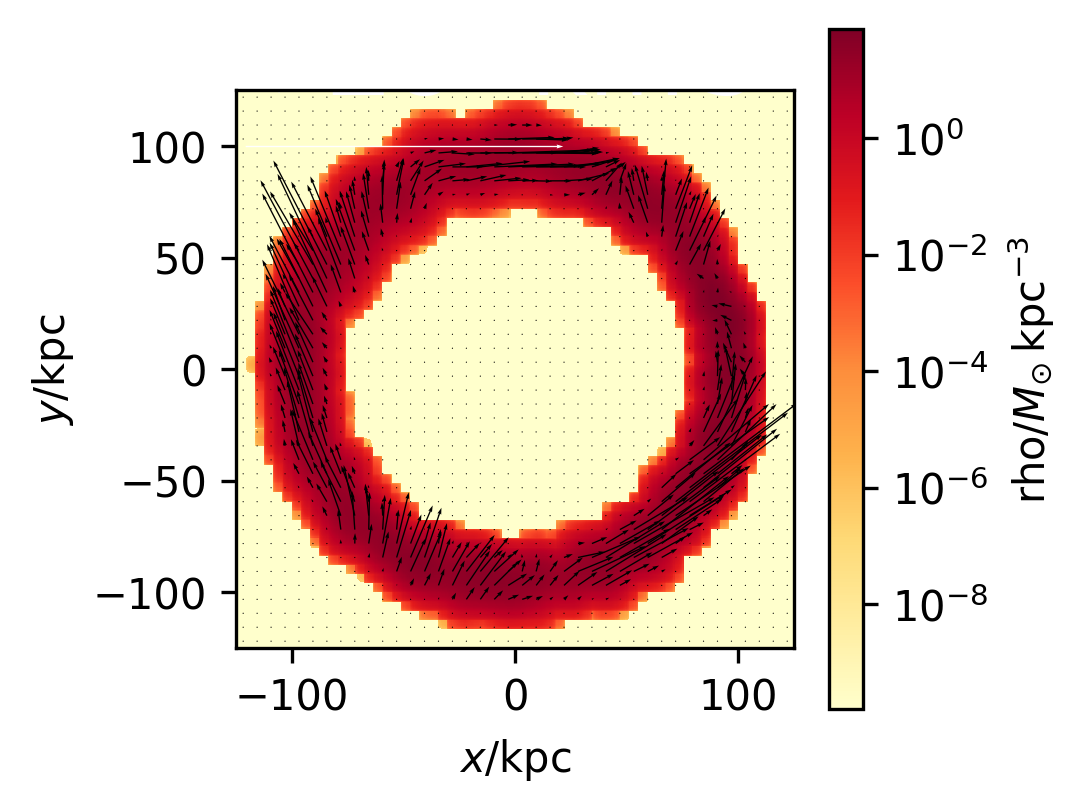

In [11]:
plt.figure(figsize=(3,3), dpi=300)
sph.velocity_image(shell_part,width=250,cmap="YlOrRd")
#sph.velocity_image(shell_part_wind, vector_color="cyan", qty="temp",width=300,cmap="YlOrRd",
#                   denoise=True,approximate_fast=False, show_cbar = True, threaded=False)
plt.show()

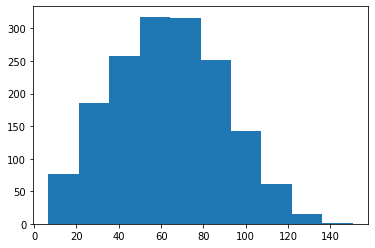

In [12]:
Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()

# Halo 3

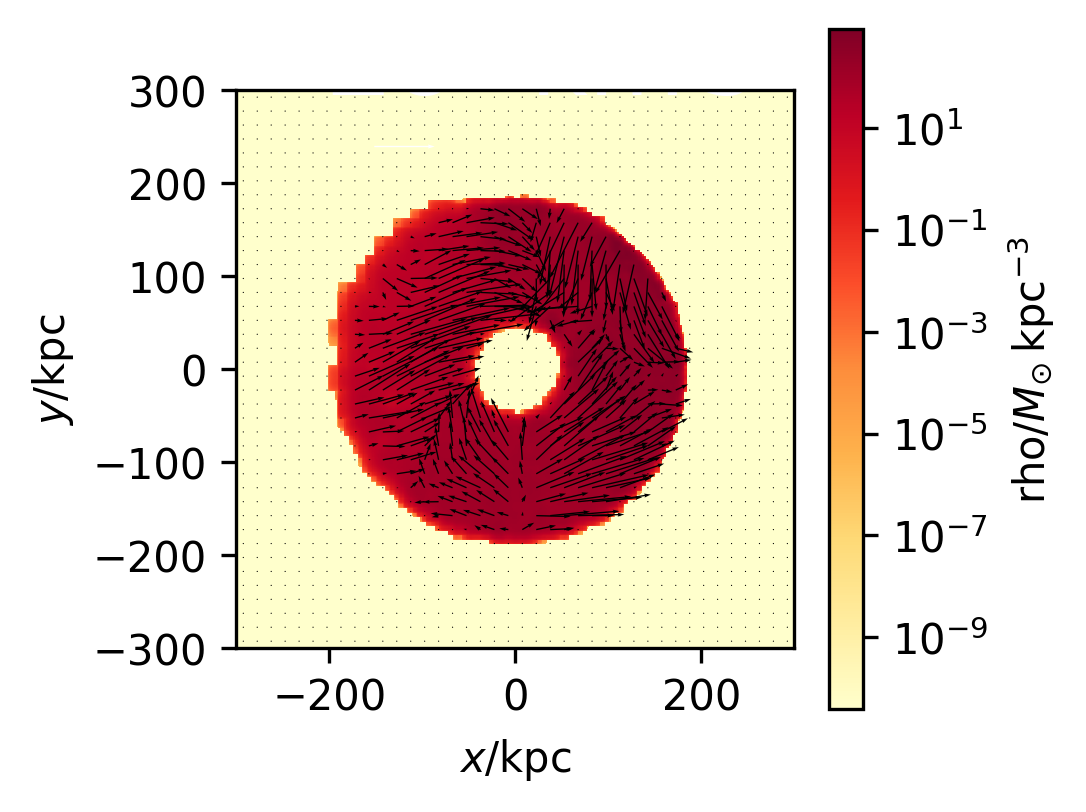

In [16]:
plt.figure(figsize=(3,3), dpi=300)
sph.velocity_image(shell_part_wind,width=600,cmap="YlOrRd")
#sph.velocity_image(shell_part_wind, vector_color="cyan", qty="temp",width=300,cmap="YlOrRd",
#                   denoise=True,approximate_fast=False, show_cbar = True, threaded=False)
plt.show()

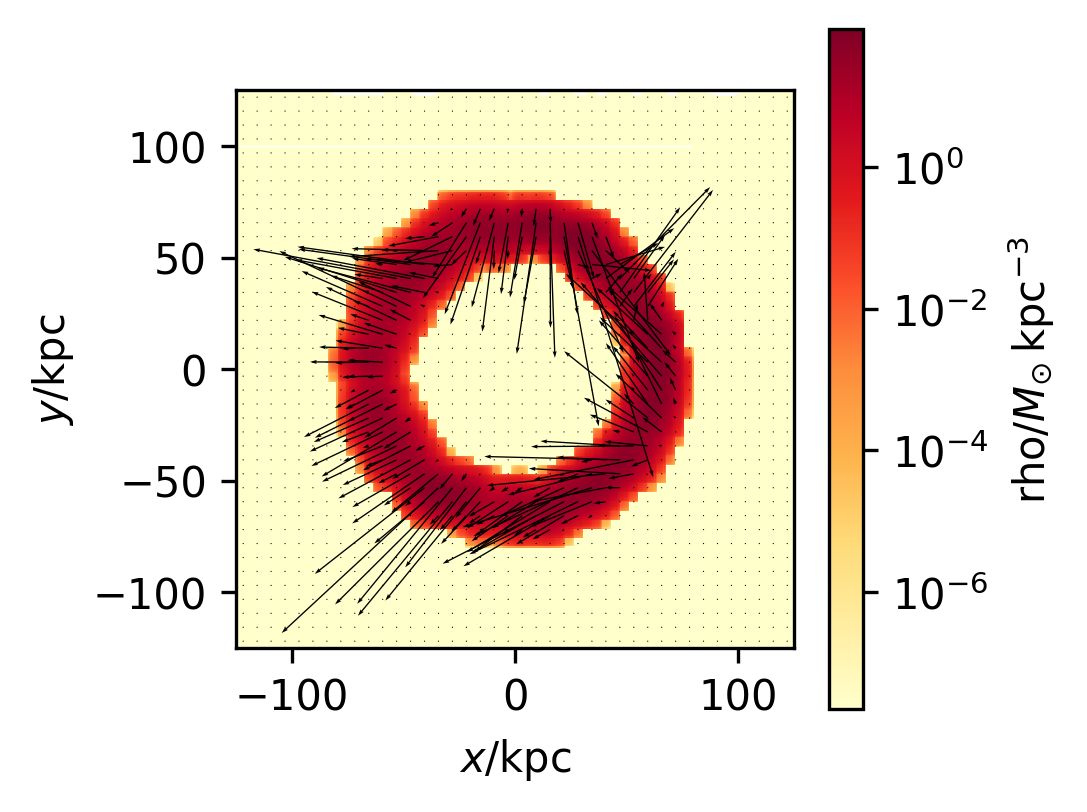

In [21]:
plt.figure(figsize=(3,3), dpi=300)
sph.velocity_image(shell_part,width=250,cmap="YlOrRd")
#sph.velocity_image(shell_part_wind, vector_color="cyan", qty="temp",width=300,cmap="YlOrRd",
#                   denoise=True,approximate_fast=False, show_cbar = True, threaded=False)
plt.show()

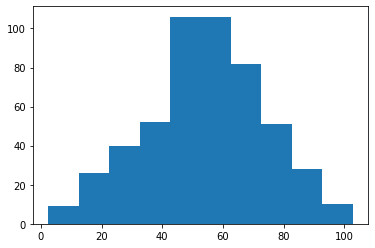

In [18]:
Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()

# Halo 5

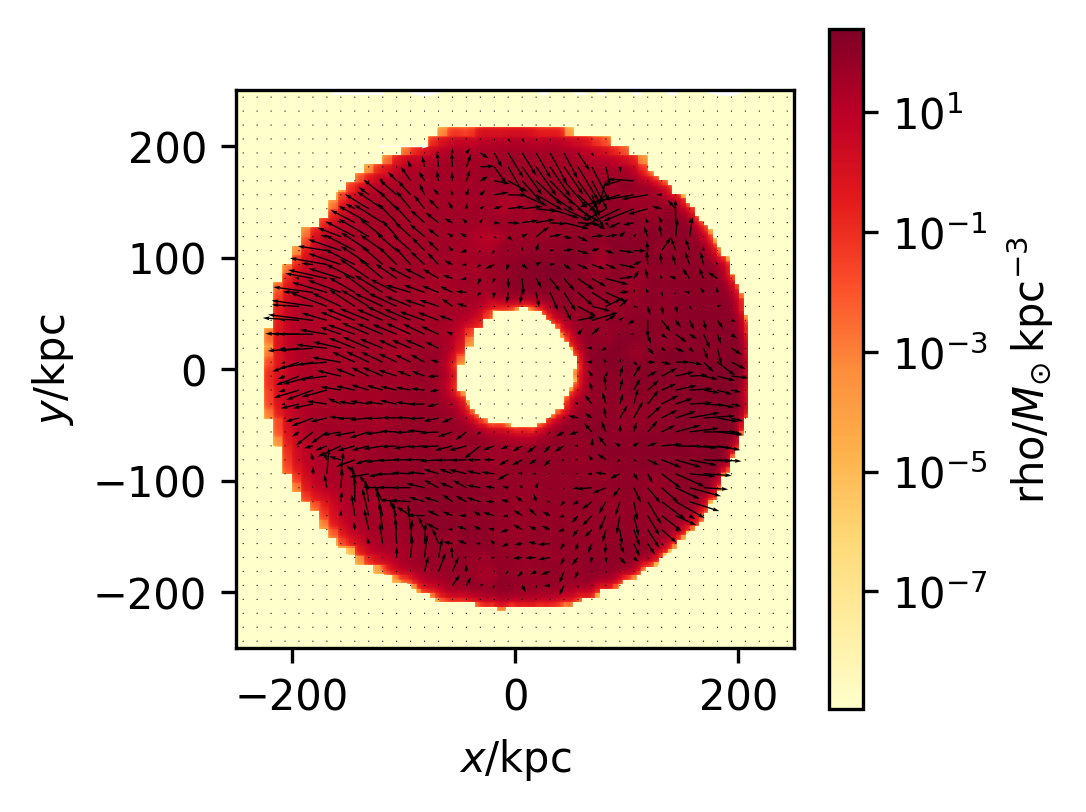

In [27]:
plt.figure(figsize=(3,3), dpi=300)
sph.velocity_image(shell_part_wind,width=500,cmap="YlOrRd")
#sph.velocity_image(shell_part_wind, vector_color="cyan", qty="temp",width=300,cmap="YlOrRd",
#                   denoise=True,approximate_fast=False, show_cbar = True, threaded=False)
plt.show()

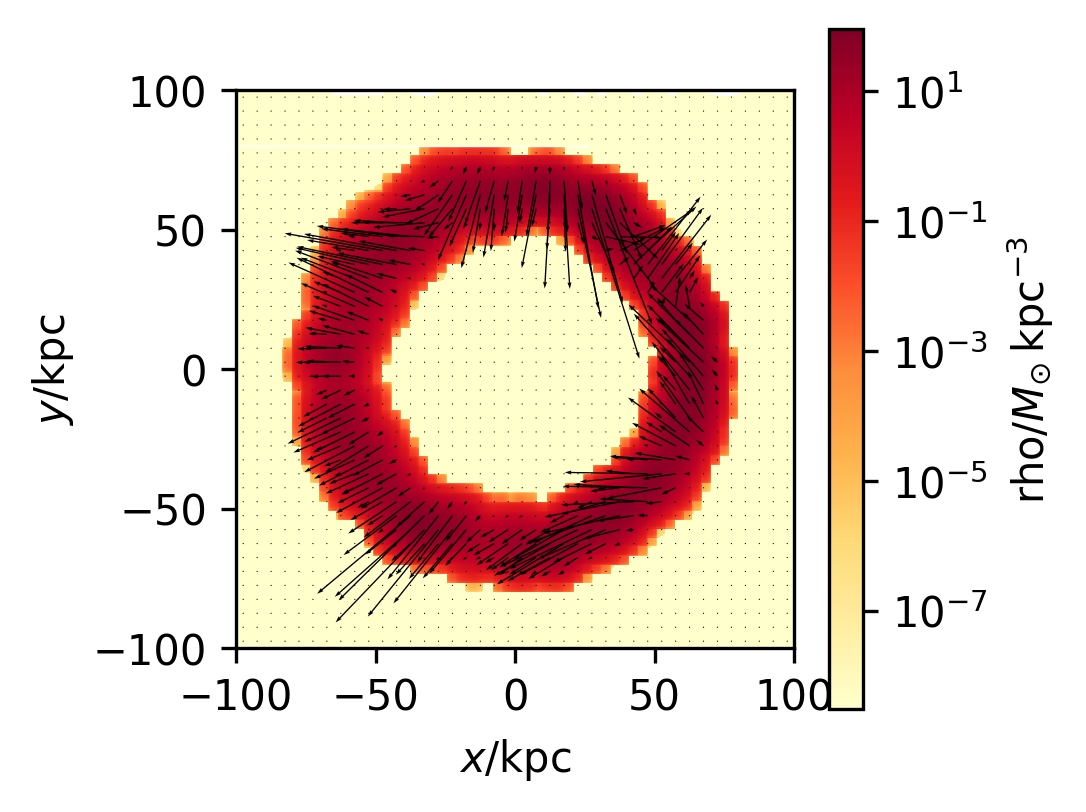

In [28]:
plt.figure(figsize=(3,3), dpi=300)
sph.velocity_image(shell_part,width=200,cmap="YlOrRd")
#sph.velocity_image(shell_part_wind, vector_color="cyan", qty="temp",width=300,cmap="YlOrRd",
#                   denoise=True,approximate_fast=False, show_cbar = True, threaded=False)
plt.show()

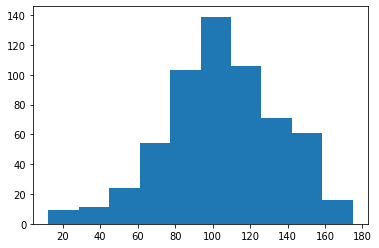

In [26]:
Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()

# Halo 6

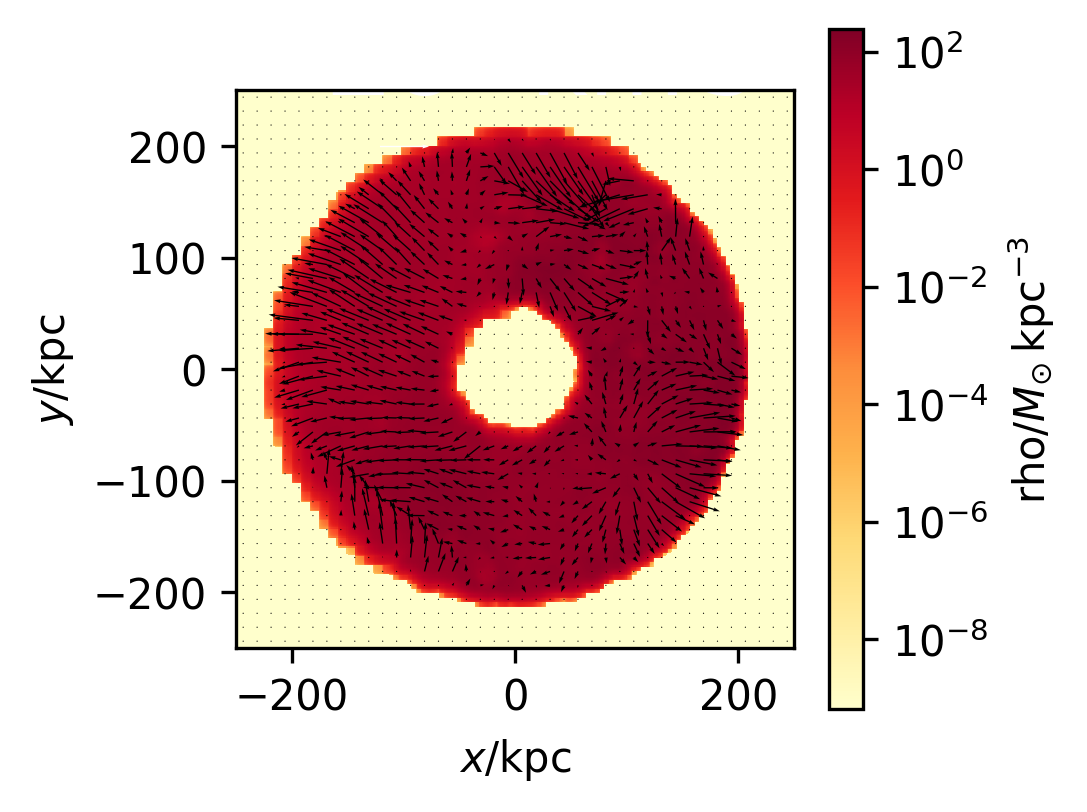

In [34]:
plt.figure(figsize=(3,3), dpi=300)
sph.velocity_image(shell_part_wind,width=500,cmap="YlOrRd")
#sph.velocity_image(shell_part_wind, vector_color="cyan", qty="temp",width=300,cmap="YlOrRd",
#                   denoise=True,approximate_fast=False, show_cbar = True, threaded=False)
plt.show()

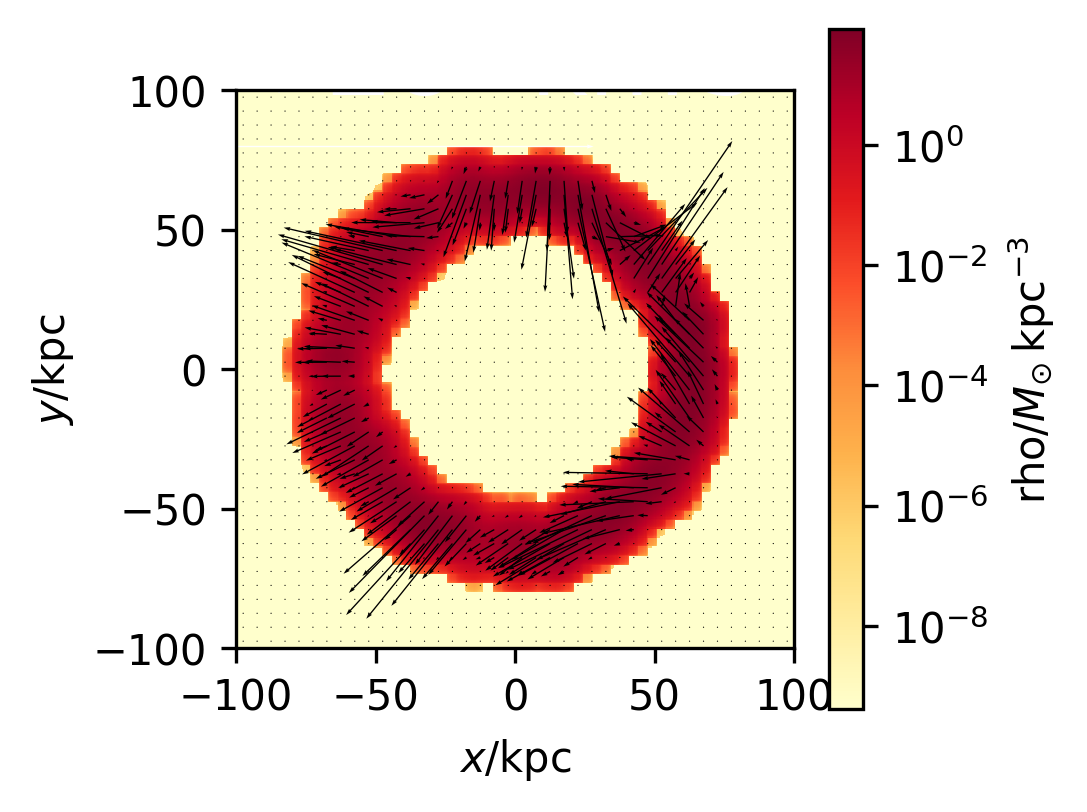

In [35]:
plt.figure(figsize=(3,3), dpi=300)
sph.velocity_image(shell_part,width=200,cmap="YlOrRd")
#sph.velocity_image(shell_part_wind, vector_color="cyan", qty="temp",width=300,cmap="YlOrRd",
#                   denoise=True,approximate_fast=False, show_cbar = True, threaded=False)
plt.show()

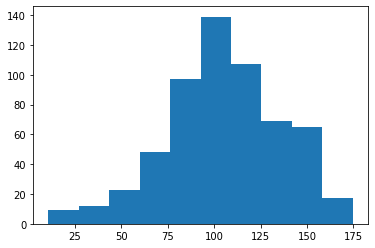

In [33]:
Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()

# Halo 10

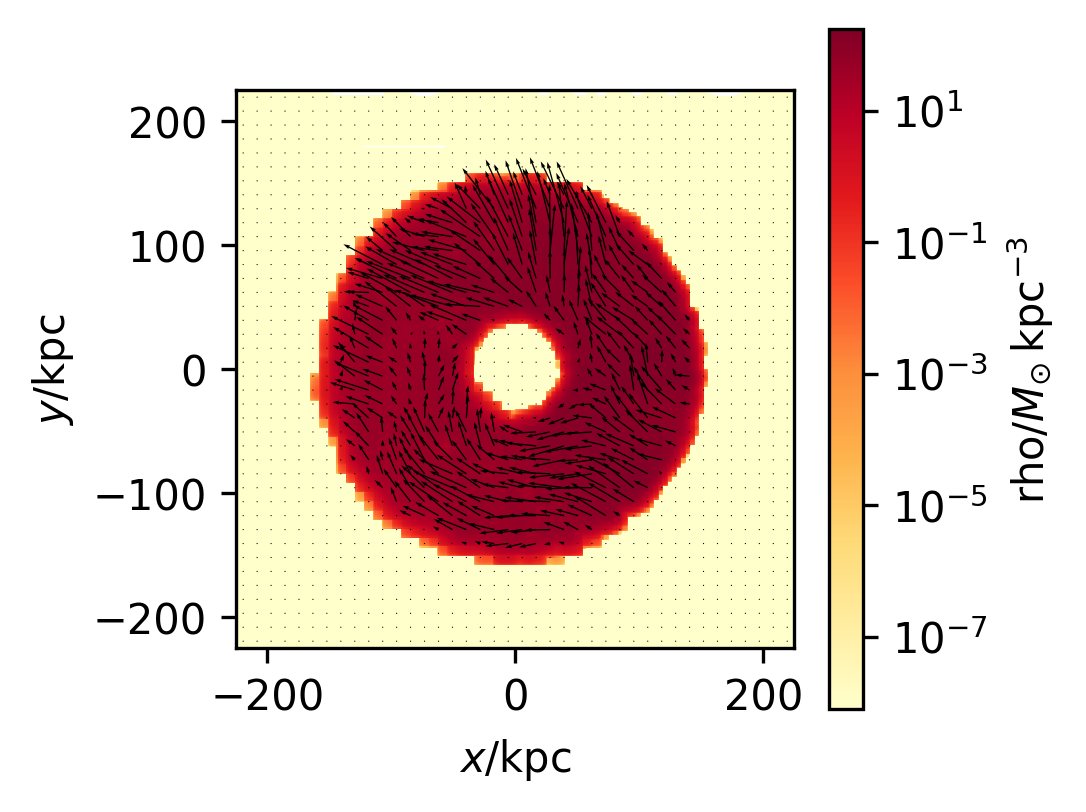

In [47]:
plt.figure(figsize=(3,3), dpi=300)
sph.velocity_image(shell_part_wind,width=450,cmap="YlOrRd")
#sph.velocity_image(shell_part_wind, vector_color="cyan", qty="temp",width=300,cmap="YlOrRd",
#                   denoise=True,approximate_fast=False, show_cbar = True, threaded=False)
plt.show()

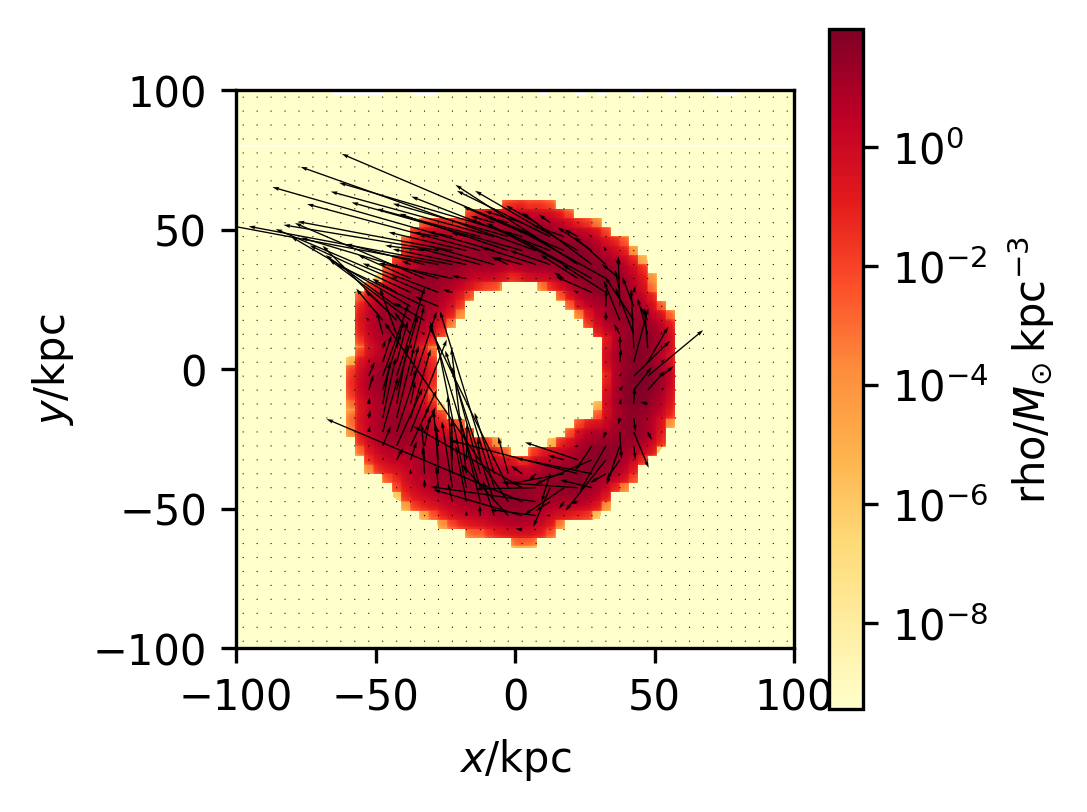

In [48]:
plt.figure(figsize=(3,3), dpi=300)
sph.velocity_image(shell_part,width=200, cmap="YlOrRd")
#sph.velocity_image(shell_part_wind, vector_color="cyan", qty="temp",width=300,cmap="YlOrRd",
#                   denoise=True,approximate_fast=False, show_cbar = True, threaded=False)
plt.show()

(array([ 6., 17., 40., 36., 30., 19.,  7.,  3.,  4.,  3.]),
 array([ 3.07013519,  7.59958865, 12.12904212, 16.65849558, 21.18794905,
        25.71740251, 30.24685598, 34.77630944, 39.30576291, 43.83521637,
        48.36466984]),
 <a list of 10 Patch objects>)

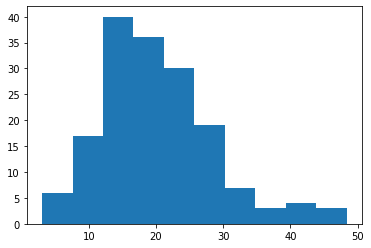

In [49]:
Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)

# Halo 11

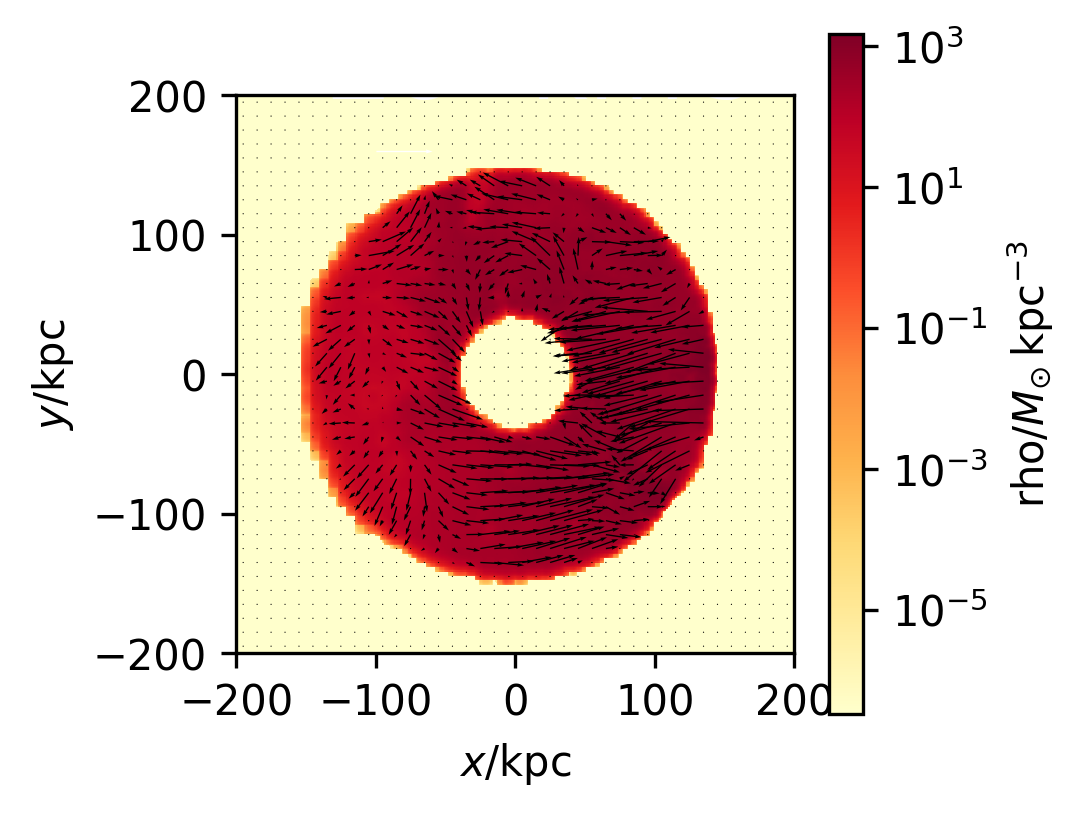

In [52]:
plt.figure(figsize=(3,3), dpi=300)
sph.velocity_image(shell_part_wind,width=400,cmap="YlOrRd")
#sph.velocity_image(shell_part_wind, vector_color="cyan", qty="temp",width=300,cmap="YlOrRd",
#                   denoise=True,approximate_fast=False, show_cbar = True, threaded=False)
plt.show()

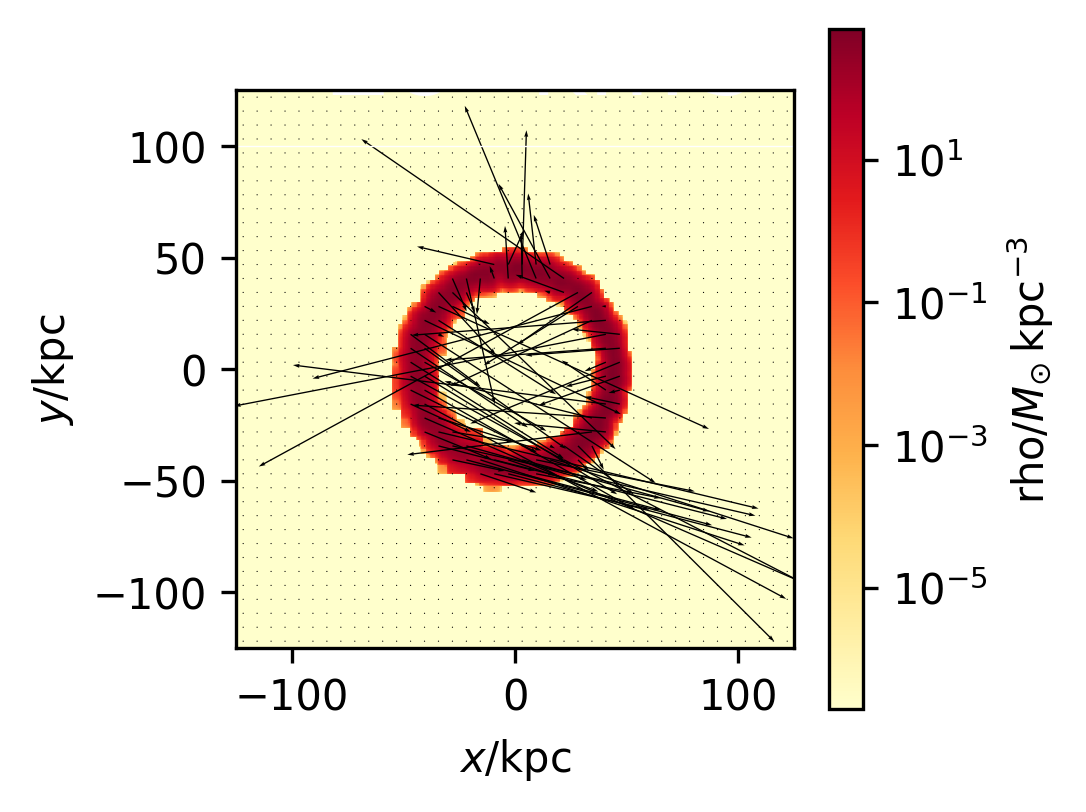

In [53]:
plt.figure(figsize=(3,3), dpi=300)
sph.velocity_image(shell_part,width=250,cmap="YlOrRd")
#sph.velocity_image(shell_part_wind, vector_color="cyan", qty="temp",width=300,cmap="YlOrRd",
#                   denoise=True,approximate_fast=False, show_cbar = True, threaded=False)
plt.show()

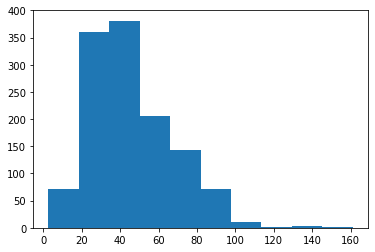

In [54]:
Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)
plt.hist(180*Theta/np.pi)
plt.show()

# halo 13

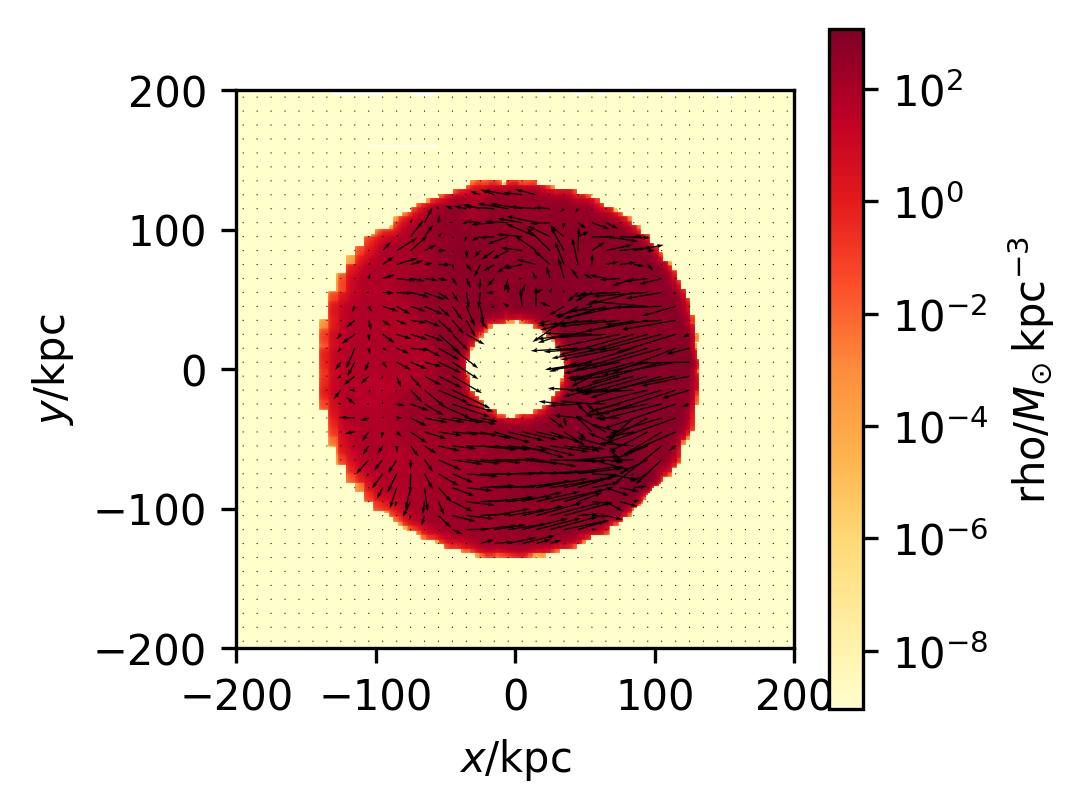

In [66]:
plt.figure(figsize=(3,3), dpi=300)
sph.velocity_image(shell_part_wind,width=400,cmap="YlOrRd")
#sph.velocity_image(shell_part_wind, vector_color="cyan", qty="temp",width=300,cmap="YlOrRd",
#                   denoise=True,approximate_fast=False, show_cbar = True, threaded=False)
plt.show()

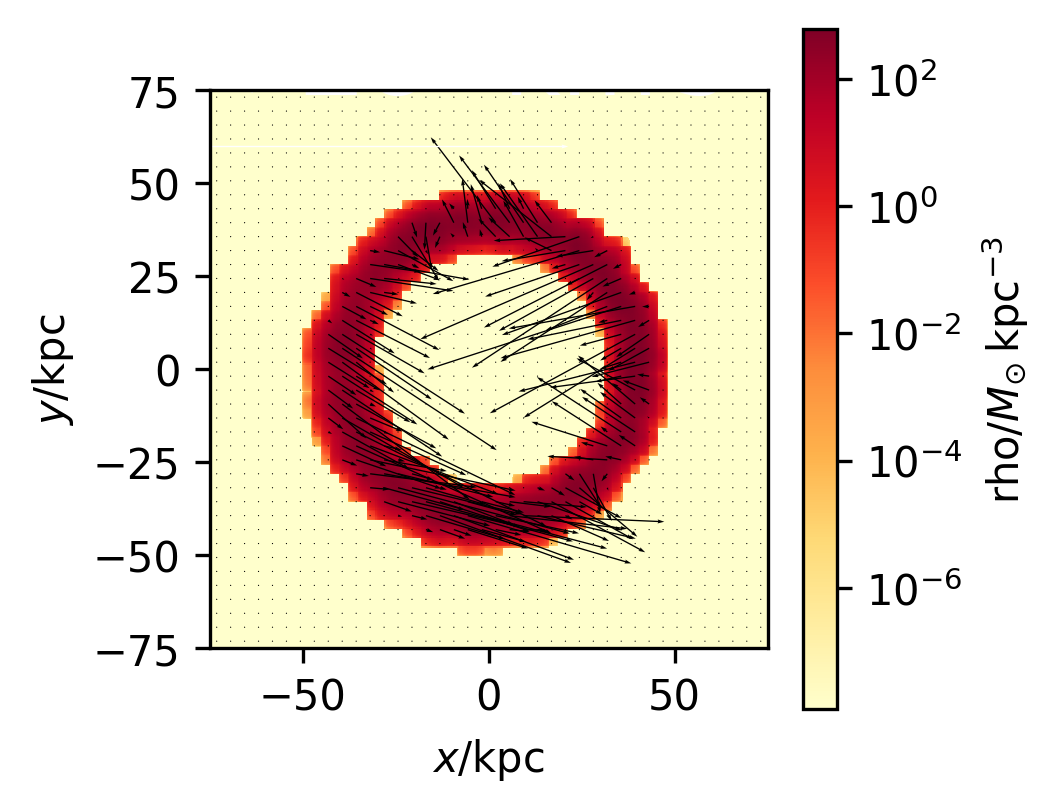

In [67]:
plt.figure(figsize=(3,3), dpi=300)
sph.velocity_image(shell_part,width=150,cmap="YlOrRd")
#sph.velocity_image(shell_part_wind, vector_color="cyan", qty="temp",width=300,cmap="YlOrRd",
#                   denoise=True,approximate_fast=False, show_cbar = True, threaded=False)
plt.show()

halo 2 h148


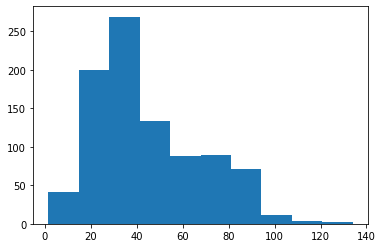

In [59]:
Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()

# Halo 14

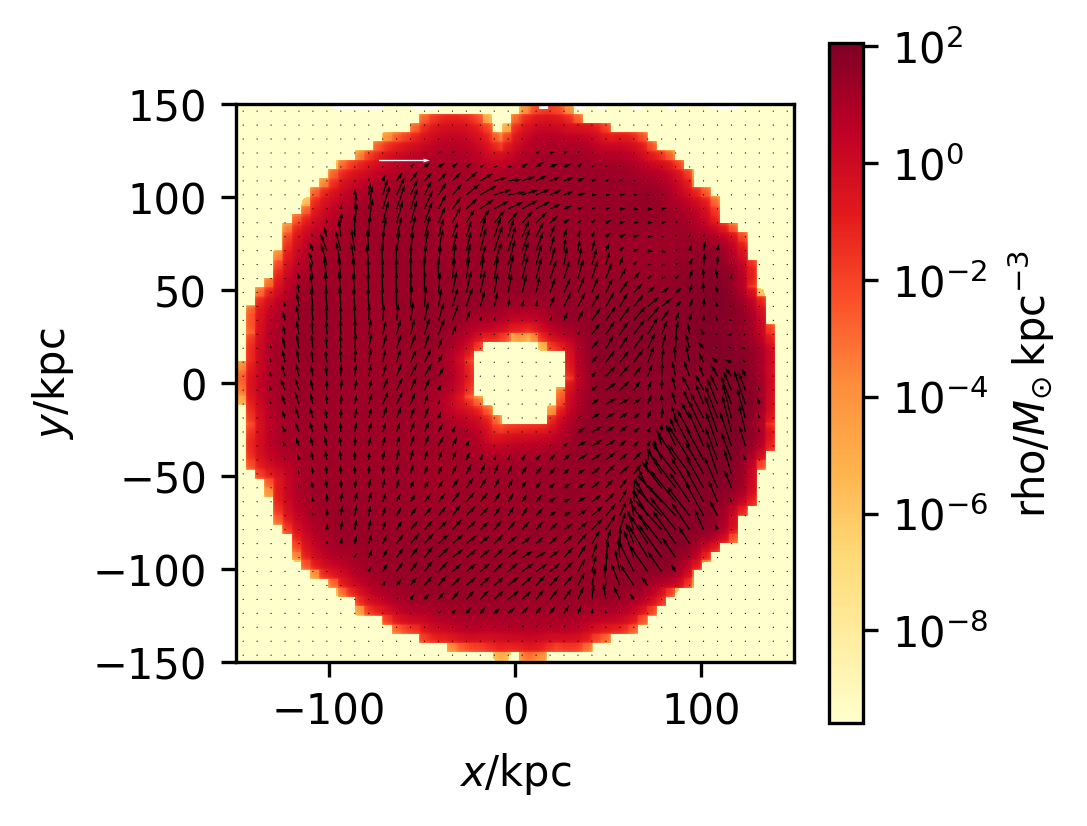

In [77]:
plt.figure(figsize=(3,3), dpi=300)
sph.velocity_image(shell_part_wind,width=300,cmap="YlOrRd")
#sph.velocity_image(shell_part_wind, vector_color="cyan", qty="temp",width=300,cmap="YlOrRd",
#                   denoise=True,approximate_fast=False, show_cbar = True, threaded=False)
plt.show()

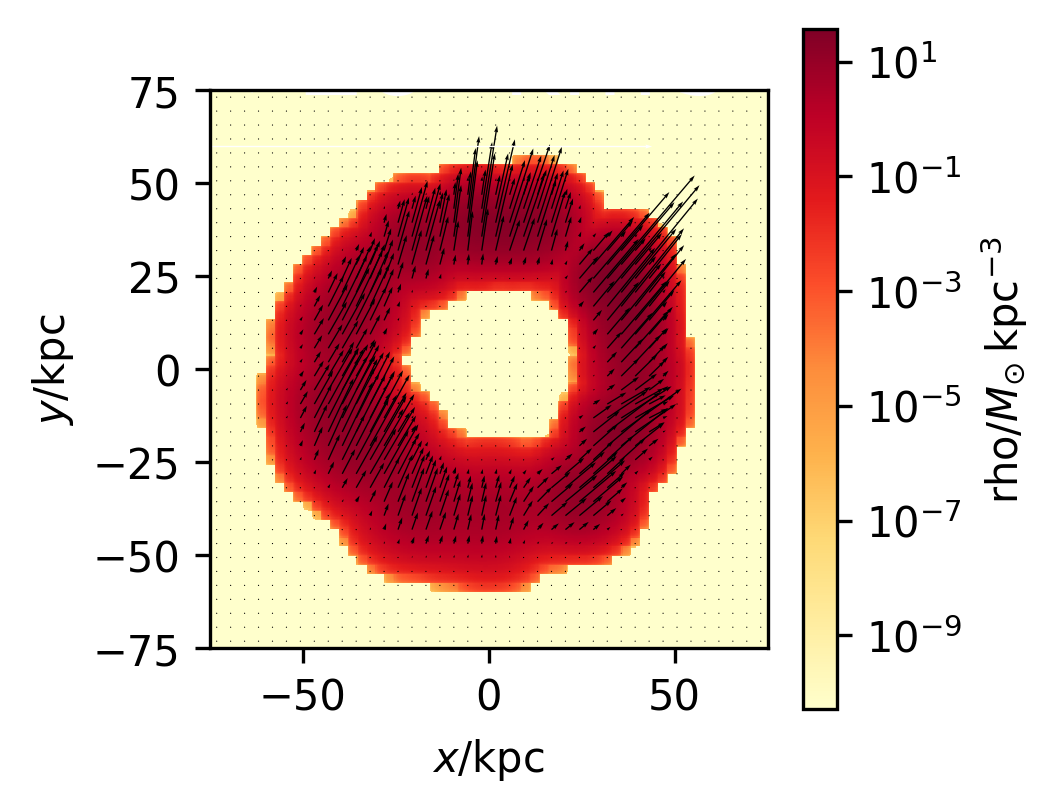

In [62]:
plt.figure(figsize=(3,3), dpi=300)
sph.velocity_image(shell_part,width=150,cmap="YlOrRd")
#sph.velocity_image(shell_part_wind, vector_color="cyan", qty="temp",width=300,cmap="YlOrRd",
#                   denoise=True,approximate_fast=False, show_cbar = True, threaded=False)
plt.show()

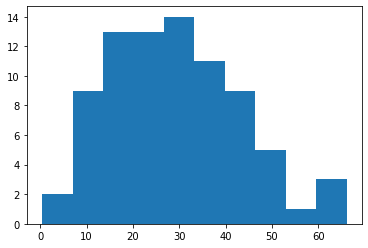

In [63]:
Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()

# Halo 21

In [16]:
%matplotlib inline
#mpl.rcParams['font.monospace'] = 'Terminal'
mpl.rc('font',**{'family':'serif','monospace':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams.update({'font.size': 9})

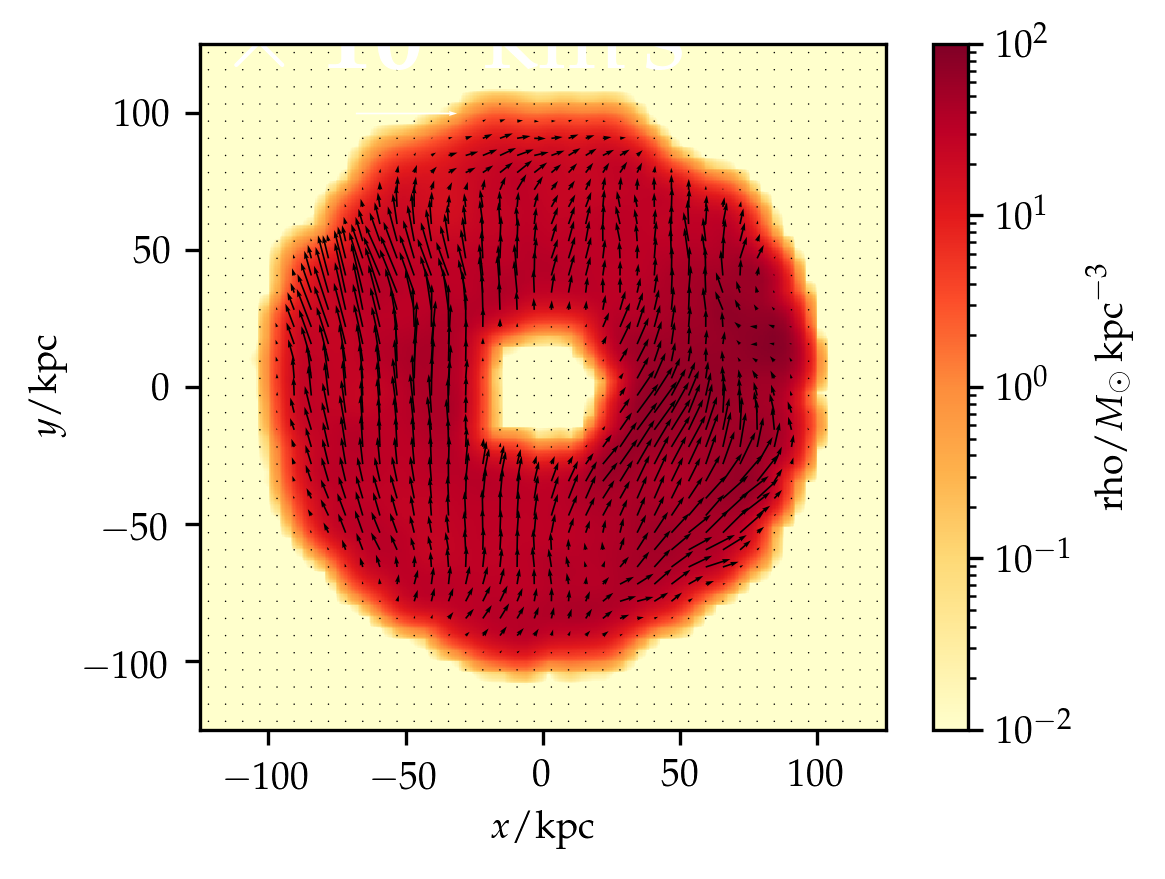

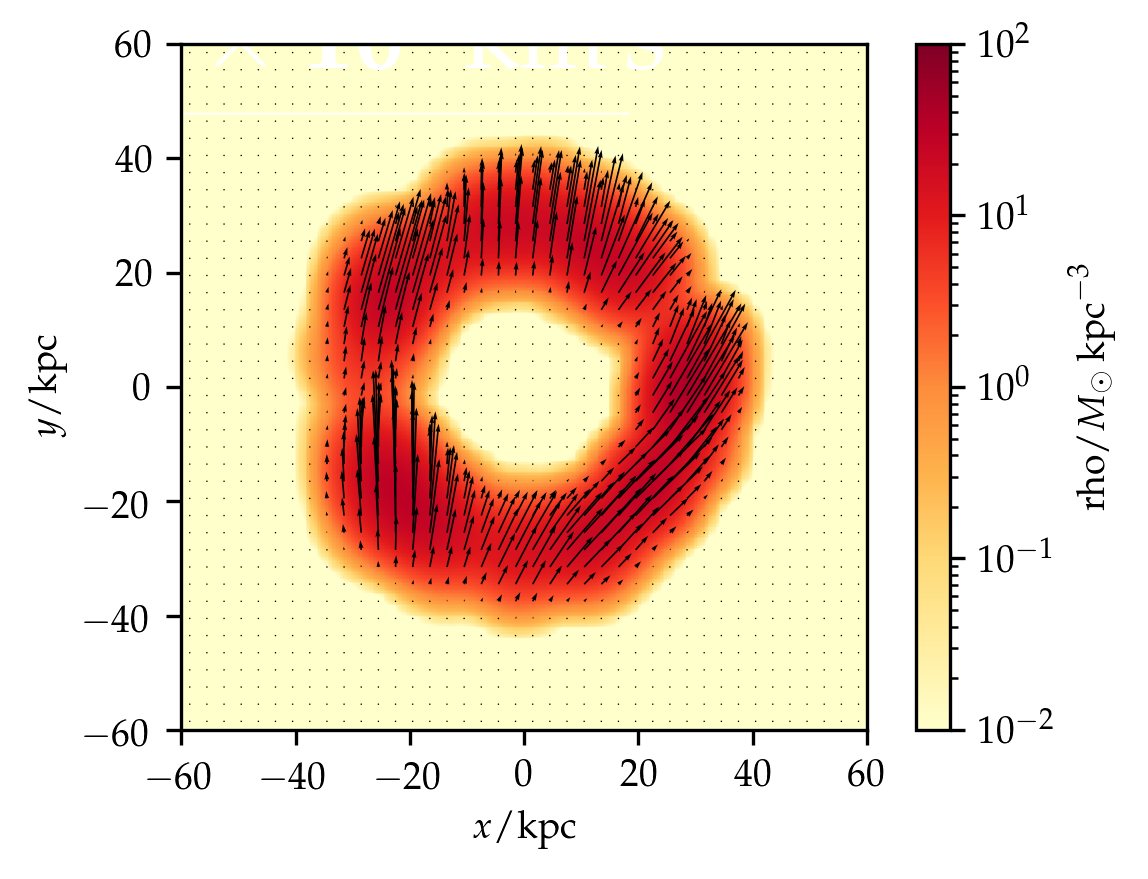

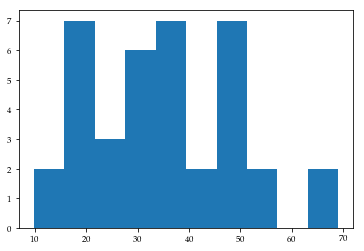

In [21]:
#21: 269       0.986428, 17.0, .003584

plt.figure(figsize=(4,3), dpi=300)
sph.velocity_image(shell_part_wind,width=250,cmap="YlOrRd", vmin=1e-2, vmax=1e2)
plt.tight_layout()
plt.savefig('Y')
plt.show()

plt.figure(figsize=(4,3), dpi=300)
sph.velocity_image(shell_part,width=120,cmap="YlOrRd", vmin=1e-2, vmax=1e2)
plt.tight_layout()
plt.savefig('Z')
plt.show()

Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)

plt.show()

# Galaxies at pericenter

In [ ]:
2: 0         0.440167, 2.0, .004096
3: 517      0.557290, 4.0, .003072
5: 106       0.497581. 5.0, .003840
6: 159       0.431314, 6.0, .003712
9: 520       0.384004, 8.0, .003072
11: 58        0.298944, 11.0, .003968
13: 726       0.428091, 12.0, .002554
27: 977      0.476595, 14.0, .002048
28: 929       0.538707, 19.0, .002088

In [133]:
timestep='002088'
sim_1 ='/home/christenc/Data/Sims/h148.cosmo50PLK.3072g/h148.cosmo50PLK.3072g3HbwK1BH/snapshots/h148.cosmo50PLK.3072g3HbwK1BH.' + timestep
s1 = pynbody.load(sim_1)
h1 = s1.halos()
s1.physical_units()
i = 19
sim = s1
h = h1
###centers the halo and adjusts the virial radius so that everything has the same units
halo_info = sim.halos(dummy=True)
halo = h.load_copy(i)
halo.physical_units()
pynbody.analysis.halo.center(halo)
rvir = halo_info[i].properties['Rvir']/halo_info[i].properties['h']*halo_info[i].properties['a']
###makes a shell of gas particles surrounding the halo 
inner_sphere_wind = pynbody.filt.Sphere(str(rvir) + ' kpc', [0,0,0])
outer_sphere_wind = pynbody.filt.Sphere(str(3*rvir) + ' kpc', [0,0,0])
shell_part_wind = sim[outer_sphere_wind & ~inner_sphere_wind].gas
print(shell_part_wind)
###makes a shell of gas particles on the outermost edge of the halo
inner_sphere = pynbody.filt.Sphere(str(.9*rvir) + ' kpc', [0,0,0])
outer_sphere = pynbody.filt.Sphere(str(rvir) + ' kpc', [0,0,0])
shell_part = sim[outer_sphere & ~inner_sphere].gas

print(shell_part)

###makes an array of the velocity for all of the particles in the outer shell of the halo
velocity = shell_part['vel'].in_units('kpc yr**-1')
r = shell_part['pos'].in_units('kpc')

vr = np.sum((velocity*r), axis=1)

Vout = []
for x in range(len(vr)):
    if vr[x] > 0:
        vel = list(velocity[x])
        Vout.append(vel)


<SimSnap "/home/christenc/Data/Sims/h148.cosmo50PLK.3072g/h148.cosmo50PLK.3072g3HbwK1BH/snapshots/h148.cosmo50PLK.3072g3HbwK1BH.002088:sphere&~sphere::gas" len=4969>
<SimSnap "/home/christenc/Data/Sims/h148.cosmo50PLK.3072g/h148.cosmo50PLK.3072g3HbwK1BH/snapshots/h148.cosmo50PLK.3072g3HbwK1BH.002088:sphere&~sphere::gas" len=50>


In [134]:
windv = (np.sum((shell_part_wind['vel']**2), axis=1))**.5
vmin = max(windv)*.3

Wind_mass = np.sum(shell_part_wind['mass'])        

Wvel = np.array(shell_part_wind['vel'])[windv > vmin]
Wymass = np.array(shell_part_wind['mass'])[windv > vmin]
        
print(np.mean(windv)-np.std(windv))

windyvec = np.mean(np.array(Wymass)[np.newaxis].T * Wvel,axis=0)/Wind_mass

###takes the magnitude of the gas velocity vectors
avecs = np.array(Vout)
amags = (np.sum((avecs**2), axis=1))**.5
###averages the wind velocity vector by mass and then takes the magnitude
#bvec = np.mean(np.array(shell_part_wind['mass'])[np.newaxis].T * shell_part_wind['vel'],axis=0)/Wind_mass
bvec = windyvec
bmag = (np.sum(bvec**2)**.5)

35.95165854283956


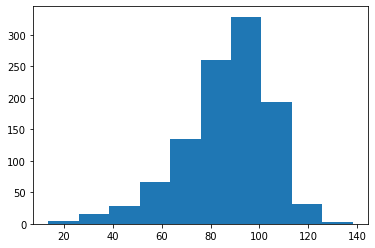

In [92]:
###Vmin is 30% of Vmax halo2

Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()

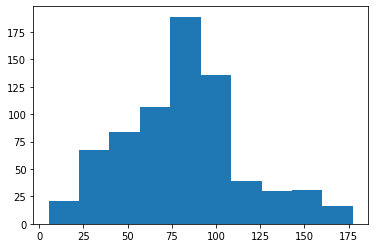

In [101]:
###Vmin is 30% of Vmax halo3

Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()

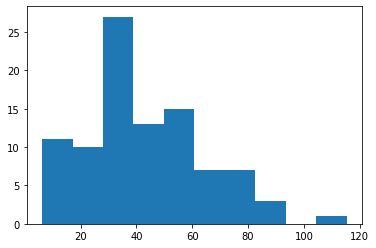

In [107]:
###Vmin is 30% of Vmax halo5

Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()

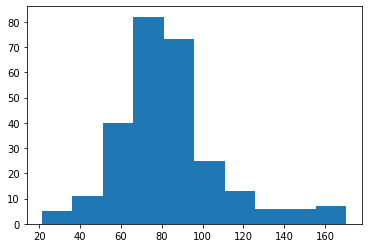

In [113]:
###Vmin is 30% of Vmax halo9

Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()

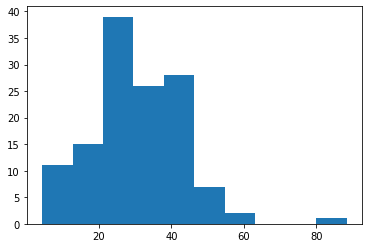

In [119]:
###Vmin is 30% of Vmax halo11

Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()

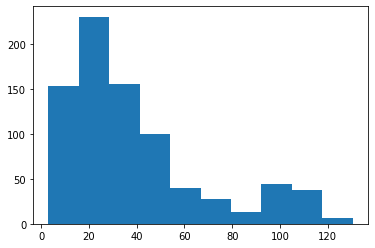

In [129]:
###Vmin is 30% of Vmax halo27

Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()

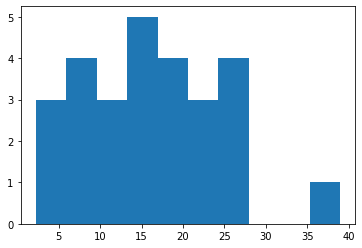

In [135]:
###Vmin is 30% of Vmax halo28

Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()

# Halo at infall Vmin  = 30%

In [ ]:
2: 260       0.840682, 2.0, .003584
3: 619      0.799894, 4.0, .002816
5: 365       0.932723, 4.0, .003328
6: 366       0.855506, 5.0, .003328
9: 673       0.992068, 9.0, .002688
10: 5         0.909648, 10.0, .004096
11: 825       0.907824, 10.0, .002304
13: 826       0.977947, 11.0, .002304
14: 164       0.956846, 12.0, .003712
21: 269       0.986428, 17.0, .003584
27: 1026     0.650821, 14.0, .001920

In [139]:
timestep='001920'
sim_1 ='/home/christenc/Data/Sims/h148.cosmo50PLK.3072g/h148.cosmo50PLK.3072g3HbwK1BH/snapshots/h148.cosmo50PLK.3072g3HbwK1BH.' + timestep
s1 = pynbody.load(sim_1)
h1 = s1.halos()
s1.physical_units()
i = 14
sim = s1
h = h1
###centers the halo and adjusts the virial radius so that everything has the same units
halo_info = sim.halos(dummy=True)
halo = h.load_copy(i)
halo.physical_units()
pynbody.analysis.halo.center(halo)
rvir = halo_info[i].properties['Rvir']/halo_info[i].properties['h']*halo_info[i].properties['a']
###makes a shell of gas particles surrounding the halo 
inner_sphere_wind = pynbody.filt.Sphere(str(rvir) + ' kpc', [0,0,0])
outer_sphere_wind = pynbody.filt.Sphere(str(3*rvir) + ' kpc', [0,0,0])
shell_part_wind = sim[outer_sphere_wind & ~inner_sphere_wind].gas
print(shell_part_wind)
###makes a shell of gas particles on the outermost edge of the halo
inner_sphere = pynbody.filt.Sphere(str(.9*rvir) + ' kpc', [0,0,0])
outer_sphere = pynbody.filt.Sphere(str(rvir) + ' kpc', [0,0,0])
shell_part = sim[outer_sphere & ~inner_sphere].gas

print(shell_part)

###makes an array of the velocity for all of the particles in the outer shell of the halo
velocity = shell_part['vel'].in_units('kpc yr**-1')
r = shell_part['pos'].in_units('kpc')

vr = np.sum((velocity*r), axis=1)

Vout = []
for x in range(len(vr)):
    if vr[x] > 0:
        vel = list(velocity[x])
        Vout.append(vel)


<SimSnap "/home/christenc/Data/Sims/h148.cosmo50PLK.3072g/h148.cosmo50PLK.3072g3HbwK1BH/snapshots/h148.cosmo50PLK.3072g3HbwK1BH.001920:sphere&~sphere::gas" len=185276>
<SimSnap "/home/christenc/Data/Sims/h148.cosmo50PLK.3072g/h148.cosmo50PLK.3072g3HbwK1BH/snapshots/h148.cosmo50PLK.3072g3HbwK1BH.001920:sphere&~sphere::gas" len=1735>


In [140]:
windv = (np.sum((shell_part_wind['vel']**2), axis=1))**.5
vmin = max(windv)*.3

Wind_mass = np.sum(shell_part_wind['mass'])        

Wvel = np.array(shell_part_wind['vel'])[windv > vmin]
Wymass = np.array(shell_part_wind['mass'])[windv > vmin]
        
print(np.mean(windv)-np.std(windv))

windyvec = np.mean(np.array(Wymass)[np.newaxis].T * Wvel,axis=0)/Wind_mass

###takes the magnitude of the gas velocity vectors
avecs = np.array(Vout)
amags = (np.sum((avecs**2), axis=1))**.5
###averages the wind velocity vector by mass and then takes the magnitude
#bvec = np.mean(np.array(shell_part_wind['mass'])[np.newaxis].T * shell_part_wind['vel'],axis=0)/Wind_mass
bvec = windyvec
bmag = (np.sum(bvec**2)**.5)

45.7491063581264


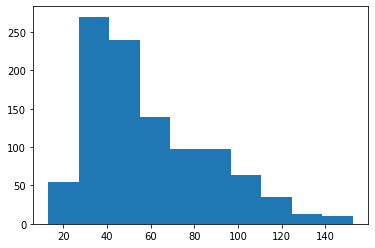

In [141]:
###Vmin is 30% of Vmax halo27

Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()

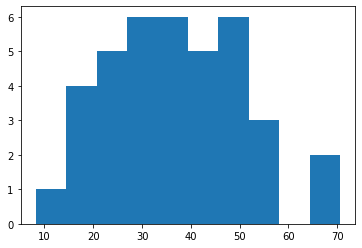

In [138]:
###Vmin is 30% of Vmax halo21

Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()

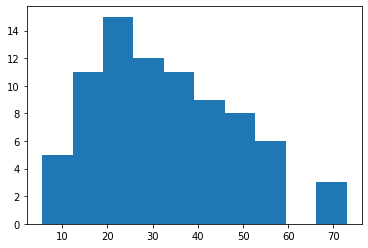

In [132]:
###Vmin is 30% of Vmax halo14

Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()

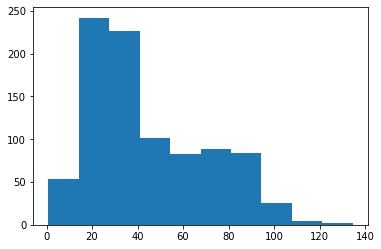

In [126]:
###Vmin is 30% of Vmax halo13

Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)ax1.semilogy()
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()

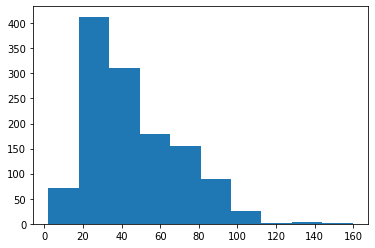

In [122]:
###Vmin is 30% of Vmax halo11

Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()

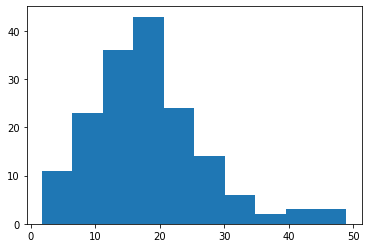

In [116]:
###Vmin is 30% of Vmax halo10

Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()

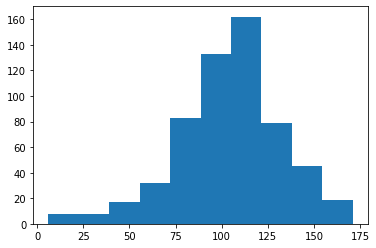

In [104]:
###Vmin is 30% of Vmax halo6

Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()

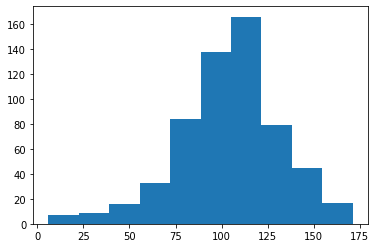

In [95]:
###Vmin is 30% of Vmax halo5

Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()

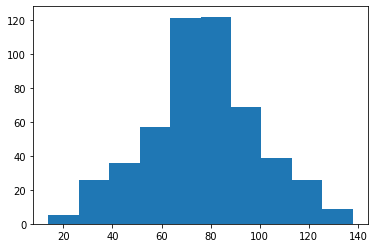

In [89]:
###Vmin is 30% of Vmax halo3

Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()

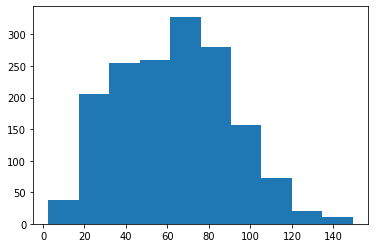

In [98]:
###Vmin is 30% of Vmax halo2

Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()

In [ ]:
2: 260       0.840682, 2.0, .003584
3: 619      0.799894, 4.0, .002816
5: 365       0.932723, 4.0, .003328
6: 366       0.855506, 5.0, .003328
9: 673       0.992068, 9.0, .002688
10: 5         0.909648, 10.0, .004096
11: 825       0.907824, 10.0, .002304
13: 826       0.977947, 11.0, .002304
14: 164       0.956846, 12.0, .003712
21: 269       0.986428, 17.0, .003584
27: 1026     0.650821, 14.0, .001920
28: 1027      0.748466, 21.0, .001920
32: 274       0.970740, 27.0, .003584

In [7]:
timestep='002816'
sim_2 ='/home/christenc/Data/Sims/h229.cosmo50PLK.3072g/h229.cosmo50PLK.3072gst5HbwK1BH/snapshots/h229.cosmo50PLK.3072gst5HbwK1BH.' + timestep      
s2 = pynbody.load(sim_2)
h2 = s1.halos()
s2.physical_units()
i = 2
sim = s2
h = h2

halo_info = sim.halos(dummy=True)
halo = h.load_copy(i)
halo.physical_units()
pynbody.analysis.halo.center(halo)
rvir = halo_info[i].properties['Rvir']/halo_info[i].properties['h']*halo_info[i].properties['a']

inner_sphere_wind = pynbody.filt.Sphere(str(rvir) + ' kpc', [0,0,0])
outer_sphere_wind = pynbody.filt.Sphere(str(3*rvir) + ' kpc', [0,0,0])
shell_part_wind = sim[outer_sphere_wind & ~inner_sphere_wind].gas
print(shell_part_wind)

inner_sphere = pynbody.filt.Sphere(str(.9*rvir) + ' kpc', [0,0,0])
outer_sphere = pynbody.filt.Sphere(str(rvir) + ' kpc', [0,0,0])
shell_part = sim[outer_sphere & ~inner_sphere].gas

print(shell_part)

velocity = shell_part['vel'].in_units('kpc yr**-1')
r = shell_part['pos'].in_units('kpc')

vr = np.sum((velocity*r), axis=1)

Vout = []
for x in range(len(vr)):
    if vr[x] > 0:
        vel = list(velocity[x])
        Vout.append(vel)
        
windv = (np.sum((shell_part_wind['vel']**2), axis=1))**.5
vmin = max(windv)*.3

Wind_mass = np.sum(shell_part_wind['mass'])        

Wvel = np.array(shell_part_wind['vel'])[windv > vmin]
Wymass = np.array(shell_part_wind['mass'])[windv > vmin]
        
print(np.mean(windv)-np.std(windv))

windyvec = np.mean(np.array(Wymass)[np.newaxis].T * Wvel,axis=0)/Wind_mass

###takes the magnitude of the gas velocity vectors
avecs = np.array(Vout)
amags = (np.sum((avecs**2), axis=1))**.5
###averages the wind velocity vector by mass and then takes the magnitude
#bvec = np.mean(np.array(shell_part_wind['mass'])[np.newaxis].T * shell_part_wind['vel'],axis=0)/Wind_mass
bvec = windyvec
bmag = (np.sum(bvec**2)**.5)

OSError: File '/home/christenc/Data/Sims/h229.cosmo50PLK.3072g/h229.cosmo50PLK.3072gst5HbwK1BH/snapshots/h229.cosmo50PLK.3072gst5HbwK1BH.002816': format not understood or does not exist

In [ ]:
plt.figure(figsize=(3,3), dpi=300)
sph.velocity_image(shell_part_wind,width=800,cmap="YlOrRd")
#sph.velocity_image(shell_part_wind, vector_color="cyan", qty="temp",width=300,cmap="YlOrRd",
#                   denoise=True,approximate_fast=False, show_cbar = True, threaded=False)
plt.show()

plt.figure(figsize=(3,3), dpi=300)
sph.velocity_image(shell_part,width=250,cmap="YlOrRd")
#sph.velocity_image(shell_part_wind, vector_color="cyan", qty="temp",width=300,cmap="YlOrRd",
#                   denoise=True,approximate_fast=False, show_cbar = True, threaded=False)
plt.show()

Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

plt.hist(180*Theta/np.pi)
plt.show()